In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mm = pd.read_csv('dengue_features_train.csv',usecols=['station_max_temp_c','week_start_date','year', 'weekofyear'])

In [3]:
mm.head(4)

,year,weekofyear,week_start_date,station_max_temp_c
0,1990,18,1990-04-30,29.4
1,1990,19,1990-05-07,31.7
2,1990,20,1990-05-14,32.2
3,1990,21,1990-05-21,33.3


In [4]:
mm.columns

Index(['year', 'weekofyear', 'week_start_date', 'station_max_temp_c'], dtype='object')

In [5]:
nn= pd.read_csv('dengue_labels_train.csv')

In [6]:
nn.head(4)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3


In [7]:
nn =  nn.merge(mm)

In [8]:
nn

,city,year,weekofyear,total_cases,week_start_date,station_max_temp_c
0,sj,1990,18,4,1990-04-30,29.4
1,sj,1990,19,5,1990-05-07,31.7
2,sj,1990,20,4,1990-05-14,32.2
3,sj,1990,21,3,1990-05-21,33.3
4,sj,1990,22,6,1990-05-28,35.0
...,...,...,...,...,...,...
2265,iq,2010,21,5,2010-05-28,35.4
2266,iq,2010,22,8,2010-06-04,34.7
2267,iq,2010,23,1,2010-06-11,32.2
2268,iq,2010,24,1,2010-06-18,31.2


In [9]:
nn['week_start_date'] = pd.to_datetime(nn['week_start_date'])

In [10]:
nn['mes']=nn['week_start_date'].dt.month

In [11]:
nn = nn.groupby('city')

In [12]:
sj = nn.get_group('sj')

In [13]:
sj

,city,year,weekofyear,total_cases,week_start_date,station_max_temp_c,mes
0,sj,1990,18,4,1990-04-30,29.4,4
1,sj,1990,19,5,1990-05-07,31.7,5
2,sj,1990,20,4,1990-05-14,32.2,5
3,sj,1990,21,3,1990-05-21,33.3,5
4,sj,1990,22,6,1990-05-28,35.0,5
...,...,...,...,...,...,...,...
2146,sj,2008,15,1,2008-04-08,32.8,4
2149,sj,2008,16,3,2008-04-15,29.4,4
2150,sj,2008,16,3,2008-04-15,33.6,4
2153,sj,2008,17,5,2008-04-22,31.7,4


In [14]:
prom = sj.groupby('mes').agg({'station_max_temp_c':'mean'})
prom

,station_max_temp_c
mes,
1,30.808197
2,31.125962
3,31.750000
4,32.079845
5,32.505000
6,32.842000
7,32.671538
8,33.033010
9,33.444444


In [15]:
ranking= prom.rank(method='min')
ranking = ranking['station_max_temp_c'].astype(int).to_list()

In [16]:
npRanking = np.array(ranking)

In [17]:
npRanking = npRanking-1

In [18]:
npRanking

array([ 0,  1,  3,  4,  6,  8,  7,  9, 10, 11,  5,  2])

In [27]:
colores = sns.color_palette("Oranges",prom.size, as_cmap=False)
colores

[(0.9976624375240293, 0.9257208765859285, 0.8537793156478277),
 (0.99520184544406, 0.8826758938869665, 0.7692733564013841),
 (0.9927412533640908, 0.8285428681276432, 0.6610073048827374),
 (0.9921568627450981, 0.756078431372549, 0.5388696655132641),
 (0.9921568627450981, 0.6727104959630912, 0.40587466359092667),
 (0.9921568627450981, 0.5915109573241062, 0.2902268358323722),
 (0.9781314878892734, 0.5108650519031142, 0.18737408688965784),
 (0.9486043829296424, 0.4222837370242214, 0.08648981161091887),
 (0.8930565167243367, 0.3402076124567474, 0.03547866205305651),
 (0.8211764705882354, 0.2718339100346021, 0.005090349865436363),
 (0.6956862745098039, 0.2275432525951557, 0.010011534025374854),
 (0.5892041522491349, 0.18800461361014995, 0.01334871203383314)]

In [28]:
orden=[]
for i in npRanking:
    orden.append(colores[i])

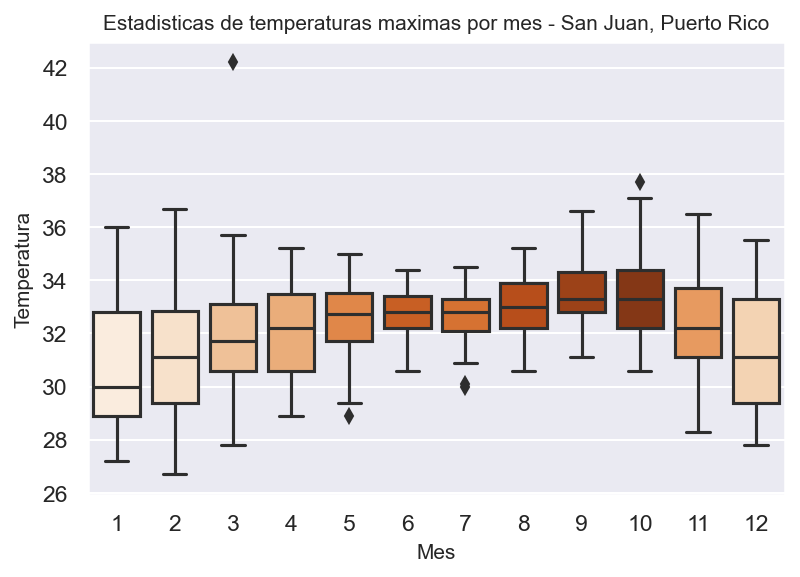

In [29]:
sns.set(rc={"figure.dpi":150})
sjx = sns.boxplot(x="mes", y="station_max_temp_c", data=sj,palette=orden)
sjx.set_title('Estadisticas de temperaturas maximas por mes - San Juan, Puerto Rico',size =10)
sjx.set_xlabel("Mes", fontsize = 10)
sjx.set_ylabel("Temperatura", fontsize = 10)
figiq = sjx.get_figure()
figiq.savefig("boxplor-TemperaturaSJ.png")

In [30]:
iq = nn.get_group('iq')

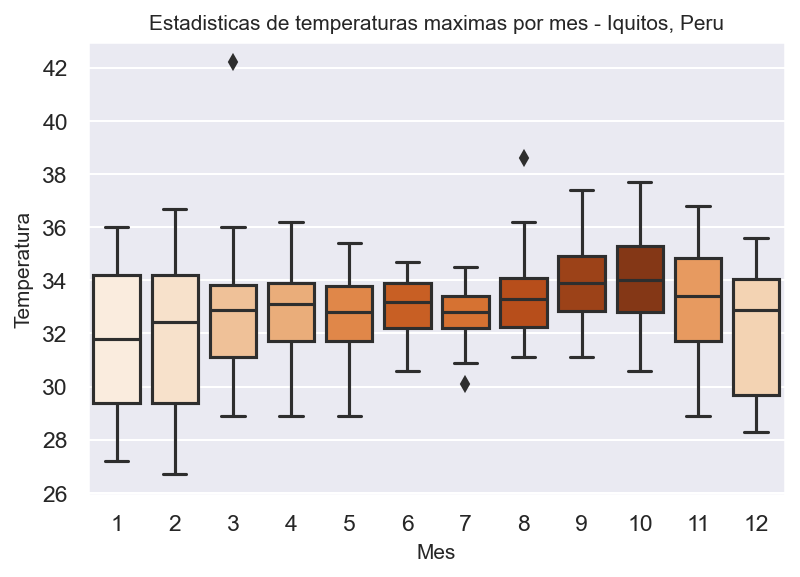

In [31]:
sns.set(rc={"figure.dpi":150})
iqx = sns.boxplot(x="mes", y="station_max_temp_c", data=iq,palette=orden)
iqx.set_title('Estadisticas de temperaturas maximas por mes - Iquitos, Peru',size =10)
iqx.set_xlabel("Mes", fontsize = 10)
iqx.set_ylabel("Temperatura", fontsize = 10)
figiq = iqx.get_figure()
figiq.savefig("boxplot-TemperaturaIQ.png")